# Multiple Linear Regression
# It is used when you have more than 1 inputs instead of only 1 input like in Simple Linear Regression

In [328]:
import numpy as np
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import statsmodels.api as sm
from IPython.display import Image 

In [278]:
data=pd.read_csv('50_Startups.csv')

In [279]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [280]:
datax=data.iloc[:,0:4].values
datay=data.iloc[:,4].values

(array([192261.83, 191792.06, 191050.39, 182901.99, 166187.94, 156991.12,
        156122.51, 155752.6 , 152211.77, 149759.96, 146121.95, 144259.4 ,
        141585.52, 134307.35, 132602.65, 129917.04, 126992.93, 125370.37,
        124266.9 , 122776.86, 118474.03, 111313.02, 110352.25, 108733.99,
        108552.04, 107404.34, 105733.54, 105008.31, 103282.38, 101004.64,
         99937.59,  97483.56,  97427.84,  96778.92,  96712.8 ,  96479.51,
         90708.19,  89949.14,  81229.06,  81005.76,  78239.91,  77798.83,
         71498.49,  69758.98,  65200.33,  64926.08,  49490.75,  42559.73,
         35673.41,  14681.4 ]),
 array([[165349.2, 136897.8, 471784.1, 'New York'],
        [162597.7, 151377.59, 443898.53, 'California'],
        [153441.51, 101145.55, 407934.54, 'Florida'],
        [144372.41, 118671.85, 383199.62, 'New York'],
        [142107.34, 91391.77, 366168.42, 'Florida'],
        [131876.9, 99814.71, 362861.36, 'New York'],
        [134615.46, 147198.87, 127716.82, 'California

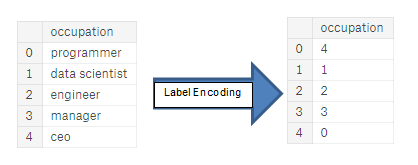

In [332]:
Image(filename='label_encoding.png', width=500)

# encoding the ordinal data 

In [281]:
le=LabelEncoder()

In [282]:
datax[:,3]=le.fit_transform(datax[:,3])  #encoding the ordinal data which is at State Column

In [284]:
onehe=OneHotEncoder(categorical_features=[3])

In [285]:
datax=onehe.fit_transform(datax).toarray()

/home/usman/.local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/usman/.local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


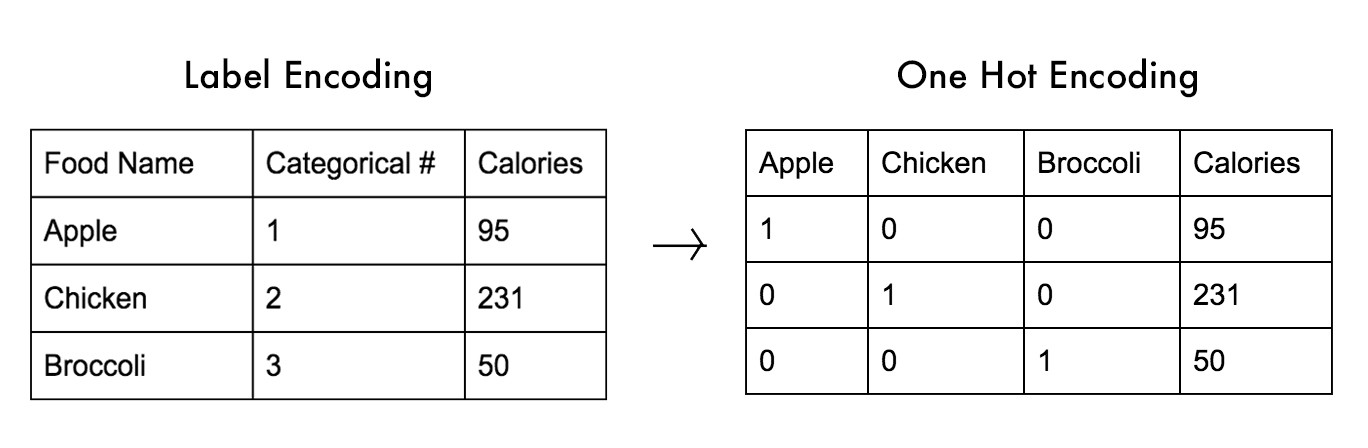

In [334]:
Image(filename='hot_encoding.jpeg',width=500)

In [335]:
datax

array([[1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6534920e+05,
        1.3689780e+05, 4.7178410e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+05,
        1.5137759e+05, 4.4389853e+05],
       [1.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5344151e+05,
        1.0114555e+05, 4.0793454e+05],
       [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.4437241e+05,
        1.1867185e+05, 3.8319962e+05],
       [1.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.4210734e+05,
        9.1391770e+04, 3.6616842e+05],
       [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.3187690e+05,
        9.9814710e+04, 3.6286136e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.3461546e+05,
        1.4719887e+05, 1.2771682e+05],
       [1.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.3029813e+05,
        1.4553006e+05, 3.2387668e+05],
       [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.2054252e+05,
        1.4871895e+05, 3.1161329e+05],
       [1.0000000e+00, 0.0000000e+00,

In [287]:
datax=datax[:,1:] #removing the first column as it can produce dummy variable
datax

array([[0.0000000e+00, 1.0000000e+00, 1.6534920e+05, 1.3689780e+05,
        4.7178410e+05],
       [0.0000000e+00, 0.0000000e+00, 1.6259770e+05, 1.5137759e+05,
        4.4389853e+05],
       [1.0000000e+00, 0.0000000e+00, 1.5344151e+05, 1.0114555e+05,
        4.0793454e+05],
       [0.0000000e+00, 1.0000000e+00, 1.4437241e+05, 1.1867185e+05,
        3.8319962e+05],
       [1.0000000e+00, 0.0000000e+00, 1.4210734e+05, 9.1391770e+04,
        3.6616842e+05],
       [0.0000000e+00, 1.0000000e+00, 1.3187690e+05, 9.9814710e+04,
        3.6286136e+05],
       [0.0000000e+00, 0.0000000e+00, 1.3461546e+05, 1.4719887e+05,
        1.2771682e+05],
       [1.0000000e+00, 0.0000000e+00, 1.3029813e+05, 1.4553006e+05,
        3.2387668e+05],
       [0.0000000e+00, 1.0000000e+00, 1.2054252e+05, 1.4871895e+05,
        3.1161329e+05],
       [0.0000000e+00, 0.0000000e+00, 1.2333488e+05, 1.0867917e+05,
        3.0498162e+05],
       [1.0000000e+00, 0.0000000e+00, 1.0191308e+05, 1.1059411e+05,
        2.29

# Time To Apply Backward Elimination Technique 
# As we are using Ordinary Least Square Method, so in this algorithm use use the following steps
# 1) Set Significance level SL=0.05

# 2) Fit the model with all predictors
# 3) Check if value Predictor>|t|>SL then remove that 
# 4) repeat again Or goto step 2
# 5) Again Fit model without P value

In [289]:
xopt=datax[:,[0,1,2,3,4,5]]

In [288]:
datax=np.append(arr=np.ones((50,1)).astype(int),values=datax,axis=1)
datax

array([[1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6534920e+05,
        1.3689780e+05, 4.7178410e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+05,
        1.5137759e+05, 4.4389853e+05],
       [1.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5344151e+05,
        1.0114555e+05, 4.0793454e+05],
       [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.4437241e+05,
        1.1867185e+05, 3.8319962e+05],
       [1.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.4210734e+05,
        9.1391770e+04, 3.6616842e+05],
       [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.3187690e+05,
        9.9814710e+04, 3.6286136e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.3461546e+05,
        1.4719887e+05, 1.2771682e+05],
       [1.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.3029813e+05,
        1.4553006e+05, 3.2387668e+05],
       [1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.2054252e+05,
        1.4871895e+05, 3.1161329e+05],
       [1.0000000e+00, 0.0000000e+00,

In [290]:
reg_ols=sm.OLS(endog=datay,exog=xopt).fit() #fitting the ouptput and input using the Ordinary Least Square Method

In [291]:
reg_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Sun, 16 Jun 2019   Prob (F-statistic):           1.34e-27
Time:                        02:23:56   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
x1           198.7888   3371.007      0.059      0.953   -6595.030    6992.607
x2           -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
x3             0.8060      0.046     17.369      0.000       0.712       0.900
x4            -0.0270      0.052     -0.517      0.608      -0.132       0.078
x5             0.0270      0.017      1.574      0.123      -0.008       0.062
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Now, here I can see that at x2 which is at index 2 has the p>|t| greater then significance value 0.05 then we should remove it

In [292]:
#removing the values that is highest against the significance which is 0.990 at x2

In [293]:
xopt=datax[:,[0,1,3,4,5]]

In [294]:
reg_ols=sm.OLS(endog=datay,exog=xopt).fit() #again fitting the model without x2

In [295]:
reg_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sun, 16 Jun 2019   Prob (F-statistic):           8.49e-29
Time:                        02:26:22   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
x1           220.1585   2900.536      0.076      0.940   -5621.821    6062.138
x2             0.8060      0.046     17.606      0.000       0.714       0.898
x3            -0.0270      0.052     -0.523      0.604      -0.131       0.077
x4             0.0270      0.017      1.592      0.118      -0.007       0.061
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Here, now I'm removing x1 because it is greater than the SL value

In [298]:
#now removing the x1 at index 1
xopt=datax[:,[0,3,4,5]]
reg_ols=sm.OLS(endog=datay,exog=xopt).fit() #applying it with x1

In [299]:
reg_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 16 Jun 2019   Prob (F-statistic):           4.53e-30
Time:                        02:29:31   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
x1             0.8057      0.045     17.846      0.000       0.715       0.897
x2            -0.0268      0.051     -0.526      0.602      -0.130       0.076
x3             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [305]:
xopt=datax[:,[0,3,5]]
reg_ols=sm.OLS(endog=datay,exog=xopt).fit()
reg_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Sun, 16 Jun 2019   Prob (F-statistic):           2.16e-31
Time:                        02:37:32   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
x1             0.7966      0.041     19.266      0.000       0.713       0.880
x2             0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Again I can see that the x2 has a higher value 0.06, although it is very small but some times it does matther.

In [306]:
xopt=datax[:,[0,3]]
reg_ols=sm.OLS(endog=datay,exog=xopt).fit() #fitting model with x2 again
reg_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sun, 16 Jun 2019   Prob (F-statistic):           3.50e-32
Time:                        02:38:31   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
x1             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Now, you can see that there is no any other value which is greater than significance value 0.05, so I can apply Multiple Linear Regression on it

In [307]:
mlr=LinearRegression() #model build

In [310]:
trainx,testx,trainy,testy=train_test_split(xopt,datay,test_size=0.2,random_state=0)
#splitting the data into training and testing
trainx,testx

(array([[1.0000000e+00, 5.5493950e+04],
        [1.0000000e+00, 4.6014020e+04],
        [1.0000000e+00, 7.5328870e+04],
        [1.0000000e+00, 4.6426070e+04],
        [1.0000000e+00, 9.1749160e+04],
        [1.0000000e+00, 1.3029813e+05],
        [1.0000000e+00, 1.1994324e+05],
        [1.0000000e+00, 1.0002300e+03],
        [1.0000000e+00, 5.4205000e+02],
        [1.0000000e+00, 6.5605480e+04],
        [1.0000000e+00, 1.1452361e+05],
        [1.0000000e+00, 6.1994480e+04],
        [1.0000000e+00, 6.3408860e+04],
        [1.0000000e+00, 7.8013110e+04],
        [1.0000000e+00, 2.3640930e+04],
        [1.0000000e+00, 7.6253860e+04],
        [1.0000000e+00, 1.5505730e+04],
        [1.0000000e+00, 1.2054252e+05],
        [1.0000000e+00, 9.1992390e+04],
        [1.0000000e+00, 6.4664710e+04],
        [1.0000000e+00, 1.3187690e+05],
        [1.0000000e+00, 9.4657160e+04],
        [1.0000000e+00, 2.8754330e+04],
        [1.0000000e+00, 0.0000000e+00],
        [1.0000000e+00, 1.6259770e+05],


In [309]:
mlr.fit(trainx,trainy) #training the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [311]:
predict_y=mlr.predict(testx) #testing the models

In [312]:
predict_y

array([104667.27805998, 134150.83410578, 135207.80019517,  72170.54428856,
       179090.58602508, 109824.77386586,  65644.27773757, 100481.43277139,
       111431.75202432, 169438.14843539])

In [314]:
testy

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [317]:
p_d=[]
for x,y in zip(predict_y,testy):
    p_d.append(abs(x-y))
p_d #this is the difference between the actual and the predicted value...

[1384.898059978601,
 10108.56589421528,
 10914.149804830784,
 5628.285711443648,
 11959.80397491649,
 4816.463865863392,
 15584.782262432229,
 2997.872771386552,
 1079.5020243210456,
 3250.2084353909886]

# Therefore, it's performance is okay but still it is performing bit better against directly applying Multiplie Linear Regression